In [8]:
!pip install chromadb open_clip_torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 70.6 MB/s eta 0:00:00


In [1]:
# packages
import os
import numpy as np
from matplotlib import pyplot as plt

import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader
import open_clip

In [2]:
# load model
# source: https://pypi.org/project/open-clip-torch-any-py3/
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32-quickgelu', pretrained='laion400m_e32')

In [3]:
# prepare vector db
chroma_db = chromadb.Client()

img_loader = ImageLoader()
multimodal_embedding_fn = OpenCLIPEmbeddingFunction()
chroma_collection = chroma_db.get_or_create_collection("dogs", embedding_function=multimodal_embedding_fn, data_loader=img_loader)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:
# add images to DB
img_folder = "dogs"
img_files = os.listdir(img_folder)
#img_files = [f"{img_folder}/{img_file}" for img_file in img_files]
chroma_collection.add( ids=img_files, documents=img_files, uris=img_files)

In [5]:
img_files

['mastiff_1.jpg',
 'akita_1.jpg',
 'affenpinscher_3.jpg',
 'entlebucher_001.jpg',
 'corgi_13.jpg',
 'akita_3.jpg']

In [6]:
# helper function to show query results
def show_query_results(query_list:list, query_result:dict):
    res_count = len(query_result['ids'][0])
    for i in range(len(query_list)):
        print(f"Query: {query_list[i]}")
        for j in range(res_count):
            id = query_result['ids'][i][j]
            distance = query_result['distances'][i][j]
            data = query_result['data'][i][j]
            uri = query_result['uris'][i][j]
            print(f"Result {j}: {uri} with distance: {np.round(distance, 2)}")
            plt.imshow(data)
            plt.axis("off")
            plt.show()

In [12]:
# Query Text
# query_list = ["dog in grassland"]
# query_list = ["dog in black fur"]
# query_list = ["dog, water"]
query_list = ["akita"]
query_result = chroma_collection.query(query_texts = query_list,
                                       n_results=3,
                                       include=['documents', 'distances', 'metadatas', 'data', 'uris'],)

Query: akita
Result 0: akita_1.jpg with distance: 0.1


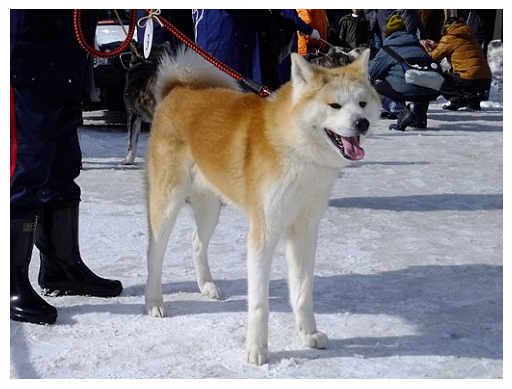

Result 1: akita_3.jpg with distance: 0.11


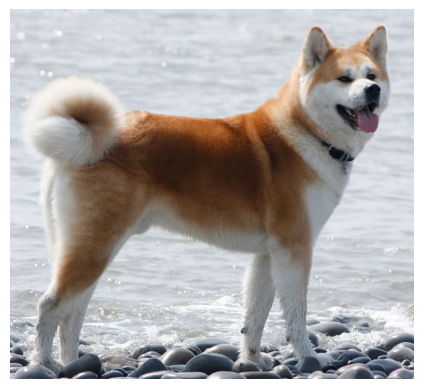

Result 2: corgi_13.jpg with distance: 0.76


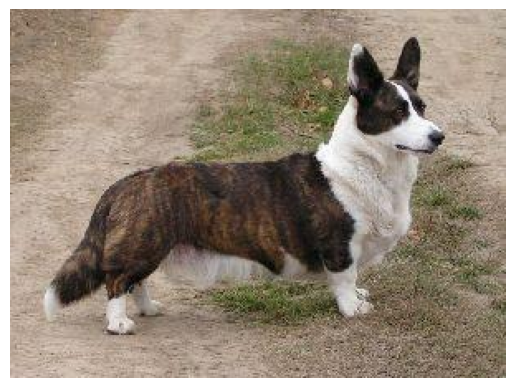

In [13]:
show_query_results(query_list, query_result)

In [15]:
# Query Image
query_list = ["dogs/akita_1.jpg"]
query_result = chroma_collection.query(query_images=query_list, n_results=2, include=['documents', 'distances', 'metadatas', 'data', 'uris'],)


Query: dogs/akita_1.jpg
Result 0: akita_3.jpg with distance: 0.17


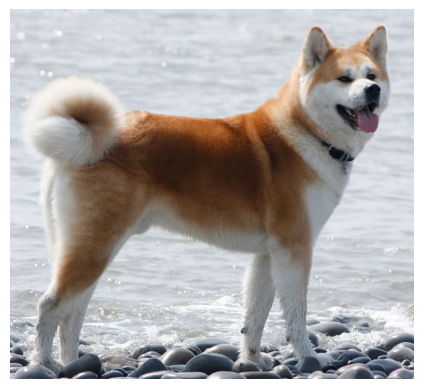

Result 1: akita_1.jpg with distance: 0.18


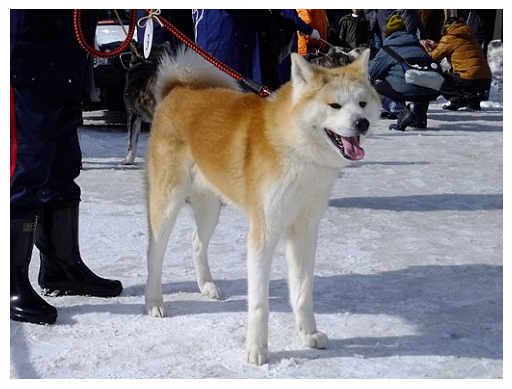

In [16]:
show_query_results(query_list, query_result)